# _Lounge_ das Representações Visuais

Neste capítulo, faremos uma aproximação às diversas classes de representações visuais disponíveis em visualização de dados sem explorar ainda as tecnicalidades de construção gráfica, parcela que será coberta no próximo módulo do curso. O nome _lounge_ é sugestivo, pois será onde teremos um encontro casual com diversas espécies de _plots_ que são cotidianamente aplicados para representar dados econômicos, científicos, sociais, industriais, entre outros. 

O propósito será compreender a finalidade e a aplicabilidade dos _plots_.  Organizaremos nosso _lounge_ nos seguintes grupos de visualização:

- quantidades;
- distribuições;
- proporções;
- correlações;
- dados geoespaciais; e
- incertezas.

## _Plots_ para visualizar quantidades

_Plots_ para quantidades são naturalmente ligados a valores numéricos associados a algumas categorias. Neste grupo encontram-se os seguintes gráficos: 

- **barras**, simples, empilhadas (_stacked_) ou agrupadas (_grouped_), dispostas horizontal ou verticalmente; 
- **pontos**, uma versão simplificada dos gráficos de barras;
- **mapas de calor** (_heatmap_), que quantificam a informação pela cor;

### Barras (_bar plot_)

Para explorar as possibilidades com gráficos de barras e verificar quando eles são ou não adequados, partiremos de uma fonte de dados relativos ao cinema. Os _dataframes_ a seguir registram as 10 maiores bilheterias do cinema nos Estados Unidos e no Brasil, em milhões de dólares, de acordo com o website [Box Office Mojo](https://www.boxofficemojo.com). Os títulos aparecem conforme veiculados no Brasil.

In [1]:
import pandas as pd

df_us = pd.read_csv('../data/top10-bilheteria-cinema-2022-us.csv')
df_br = pd.read_csv('../data/top10-bilheteria-cinema-2022-br.csv')
df_us

Filme  Bilheteria (M US$)
0                         Top Gun: Maverick               718.3
1        Pantera Negra: Wakanda para Sempre               436.5
2  Doutor Estranho no Multiverso da Loucura               411.3
3                 Avatar: O Caminho da Água               401.0
4                   Jurassic World: Domínio               376.8
5                Minions 2: A Origem de Gru               369.6
6                                    Batman               369.3
7                       Thor: Amor e Trovão               343.2
8         Homem Aranha: Sem Volta para Casa               231.8
9                          Sonic 2: O Filme               190.8

In [2]:
df_br

Filme  Bilheteria (M US$)
0         Homem Aranha: Sem Volta para Casa                56.4
1  Doutor Estranho no Multiverso da Loucura                33.7
2                 Avatar: O Caminho da Água                31.4
3                       Thor: Amor e Trovão                23.1
4                Minions 2: A Origem de Gru                22.8
5                                    Batman                22.7
6                         Top Gun: Maverick                22.2
7        Pantera Negra: Wakanda para Sempre                21.2
8                   Jurassic World: Domínio                15.4
9                                Adão Negro                15.3

#### Barras simples (_bar plot_)

A maneira mais direta de comparar esses números é plotando um gráfico de barras. Vamos testar a disposição vertical.

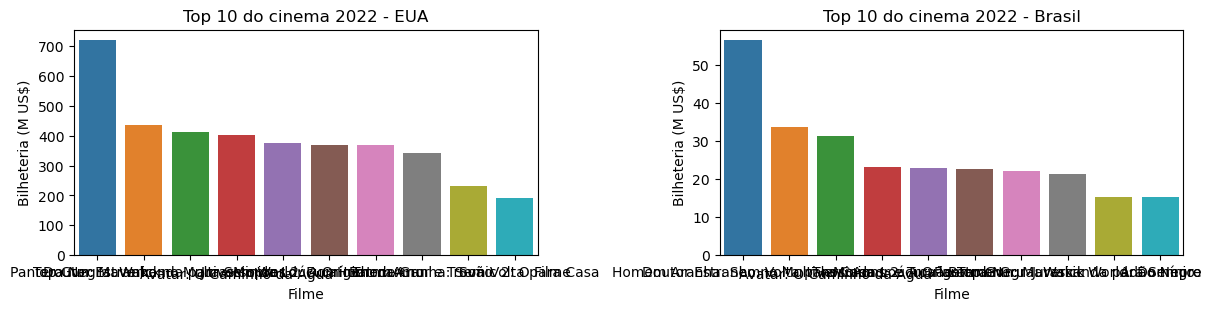

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(1,2,figsize=(12,3),constrained_layout=True)
g1 = sb.barplot(data=df_us,x='Filme',y='Bilheteria (M US$)',hue=None,errorbar=None,orient='v',ax=ax[0])
g2 = sb.barplot(data=df_br,x='Filme',y='Bilheteria (M US$)',hue=None,errorbar=None,orient='v',ax=ax[1])

g1.set_title('Top 10 do cinema 2022 - EUA')
g2.set_title('Top 10 do cinema 2022 - Brasil');

Porém, a pergunta é: quais são os filmes?! Como vemos, a identificação dos nomes dos filmes está prejudicada porque são legendas longas. Vamos testar com rotação.

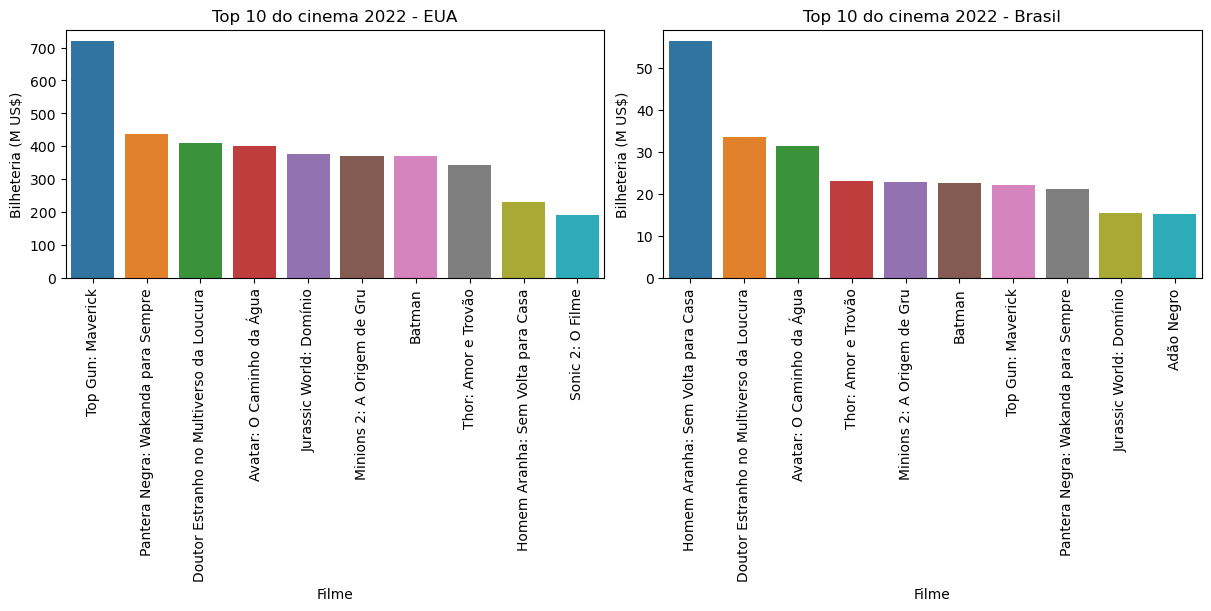

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,6),constrained_layout=True)
g1 = sb.barplot(data=df_us,x='Filme',y='Bilheteria (M US$)',hue=None,errorbar=None,orient='v',ax=ax[0])
g2 = sb.barplot(data=df_br,x='Filme',y='Bilheteria (M US$)',hue=None,errorbar=None,orient='v',ax=ax[1])

g1.set_title('Top 10 do cinema 2022 - EUA')
ax[0].tick_params(axis='x',rotation=90)
g2.set_title('Top 10 do cinema 2022 - Brasil')
ax[1].tick_params(axis='x',rotation=90);

O visual não parece bom porque os nomes ainda são difíceis de ler. Vamos tentar com barras horizontais.

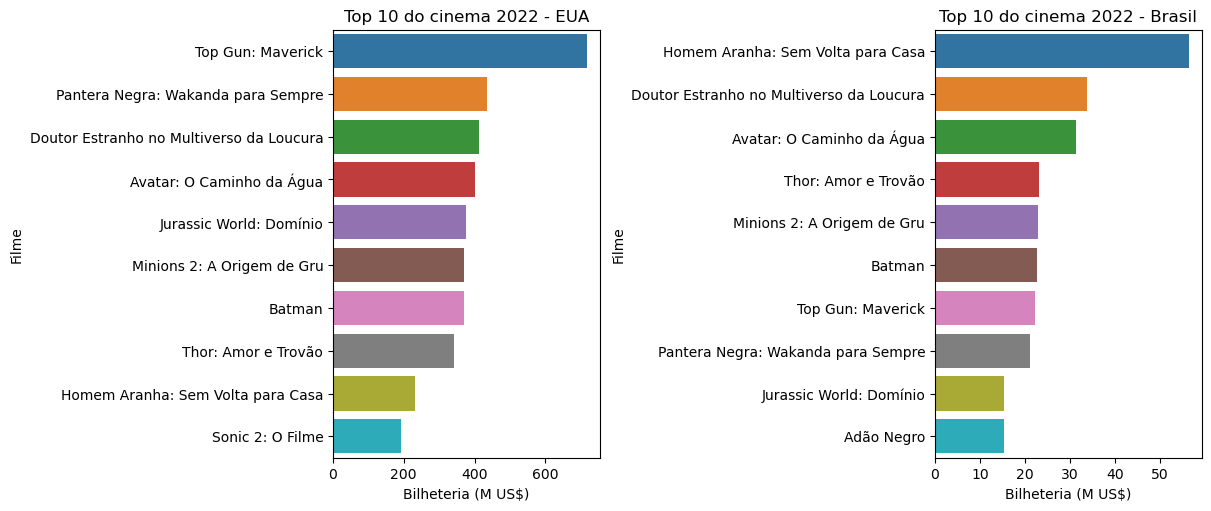

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,5),constrained_layout=True)
g1 = sb.barplot(data=df_us,y='Filme',x='Bilheteria (M US$)',hue=None,errorbar=None,orient='h',ax=ax[0])
g2 = sb.barplot(data=df_br,y='Filme',x='Bilheteria (M US$)',hue=None,errorbar=None,orient='h',ax=ax[1])

g1.set_title('Top 10 do cinema 2022 - EUA')
g2.set_title('Top 10 do cinema 2022 - Brasil');

Com as barras horizontais, os nomes dos filmes são melhor identificáveis. Porém, há uma série de melhorias ainda a fazer neste visual. Vamos discuti-las posteriormente.

#### Barras agrupadas (_grouped bar plot_)

Enquanto as barras simples são capazes de mostrar como quantidades variam em relação a apenas uma categoria, as barras agrupadas são capazes de mostrar variação de quantidades em mais do que uma categoria. No exemplo anterior, a categoria única era o nome dos filmes. Agora, vamos criar um gráfico de barras agrupadas colocando lado a lado os filmes do TOP 10 internacional que também estiveram entre os TOP 10 do Brasil e criar uma categorização baseada na localização geográfica. 

Primeiramente, vamos localizar os filmes intersectantes.

In [6]:
df_merge = pd.merge(df_us,df_br,how='inner',on='Filme'); 
df_merge

Filme  Bilheteria (M US$)_x  \
0                         Top Gun: Maverick                 718.3   
1        Pantera Negra: Wakanda para Sempre                 436.5   
2  Doutor Estranho no Multiverso da Loucura                 411.3   
3                 Avatar: O Caminho da Água                 401.0   
4                   Jurassic World: Domínio                 376.8   
5                Minions 2: A Origem de Gru                 369.6   
6                                    Batman                 369.3   
7                       Thor: Amor e Trovão                 343.2   
8         Homem Aranha: Sem Volta para Casa                 231.8   

   Bilheteria (M US$)_y  
0                  22.2  
1                  21.2  
2                  33.7  
3                  31.4  
4                  15.4  
5                  22.8  
6                  22.7  
7                  23.1  
8                  56.4

Em seguida, vamos converter os valores das bilheterias em dólares para reais utilizando a taxa de câmbio PTAX 1:5.2171 (dezembro de 2022) e renomear as variáveis de dados.

In [7]:
df_merge['Bilheteria - BR'] = df_merge['Bilheteria (M US$)_y']*5.2171
df_merge = df_merge.drop('Bilheteria (M US$)_y',axis=1)
df_merge['Bilheteria - US'] = df_merge['Bilheteria (M US$)_x']*5.2171
df_merge = df_merge.drop('Bilheteria (M US$)_x',axis=1)
df_merge

Filme  Bilheteria - BR  Bilheteria - US
0                         Top Gun: Maverick        115.81962       3747.44293
1        Pantera Negra: Wakanda para Sempre        110.60252       2277.26415
2  Doutor Estranho no Multiverso da Loucura        175.81627       2145.79323
3                 Avatar: O Caminho da Água        163.81694       2092.05710
4                   Jurassic World: Domínio         80.34334       1965.80328
5                Minions 2: A Origem de Gru        118.94988       1928.24016
6                                    Batman        118.42817       1926.67503
7                       Thor: Amor e Trovão        120.51501       1790.50872
8         Homem Aranha: Sem Volta para Casa        294.24444       1209.32378

Em seguida, manipularemos os nossos dados para identificar cada filme e seu valor pela categoria "Local".

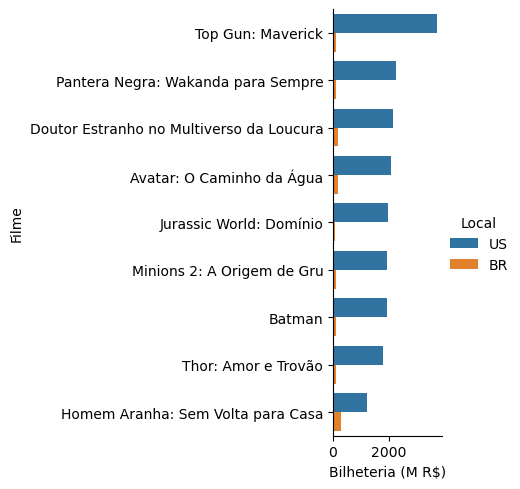

In [8]:
# recria Dataframe para ter categoria 'Local'
s = []
for i in range(len(df_merge)):
    s.append( (df_merge['Filme'][i],df_merge['Bilheteria - US'][i],'US') )
    s.append( (df_merge['Filme'][i],df_merge['Bilheteria - BR'][i],'BR') )

f,v,p = [],[],[]
for si in s:
    f.append(si[0])
    v.append(si[1])
    p.append(si[2])

df_f = pd.DataFrame({'Filme':f,'Bilheteria':v,'Local':p})

# figura
g3 = sb.catplot(data=df_f, kind="bar", y='Filme', x='Bilheteria', hue='Local',orient='h')
g3.set_xlabels('Bilheteria (M R$)');

#### Barras empilhadas (_stacked bar plot_)

Barras empilhadas são adequadas para visualizar quantidades que produzem um total significativo a partir de parcelas que exibem, com clareza, suas proporções para este todo. No exemplo a seguir, procuramos mostrar o peso das bilheterias dos filmes assistidos no Brasil comparado ao peso das bilheterias dos filmes assistidos nos Estados Unidos. Isto é, cada barra representa a soma, em reais, angariada por cada filme nos dois países e cada segmento as parcelas desta soma por localidade. Como se vê, a bilheteria americana é consideravelmente maior do que a brasileira em todos os filmes. Entretanto, percebemos que a ordem de preferência do público americano não se equiparou a da audiência brasileira.

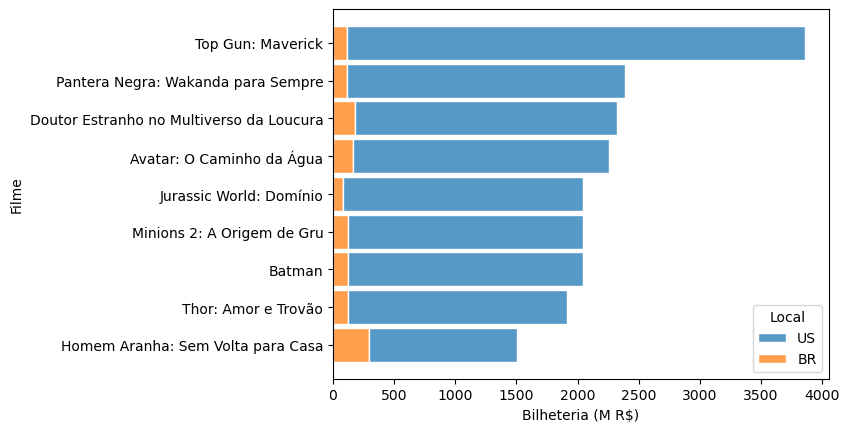

In [9]:
ax = sb.histplot(df_f,
    y='Filme', # use 'x' para vertical
    weights='Bilheteria', # pesos
    hue='Local',
    multiple='stack',
    #palette=['#aab1d1', '#ae24d1'], # paleta
    edgecolor='white',
    shrink=0.9 # fator de largura
)
ax.set_xlabel('Bilheteria (M R$)');

### Pontos (_dot plot_)

O _plot_ de pontos simplifica a escala representada visualmente por gráficos de barra. A posição do ponto marca a quantidade expressa no eixo correspondente. Vimos um exemplo aplicado deste gráfico na {numref}`Seção %s <sec:aplicado-quantitativo>`. Na representação abaixo, utilizamos a mesma fonte de dados para plotar as áreas de uma amostra de 35 municípios. A escala logarítmica permite que tenhamos uma visão ampla da extensão em quilômetros quadrados por meio de potências de 10.

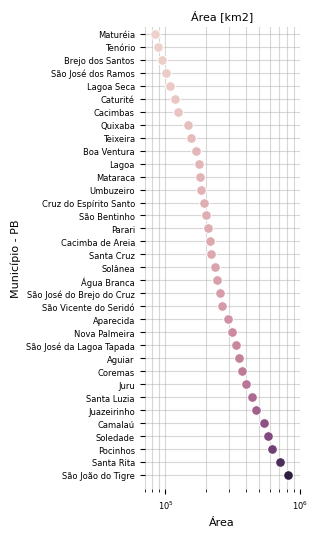

In [10]:
from matplotlib.pyplot import subplots
from seaborn import set_palette, lineplot
from scipy.stats import zscore
from pandas import DataFrame
import cartopy.io.shapereader as shpreader

# recupera dados do shapefile
shp = shpreader.Reader('../data/PB_Municipios_2021/')
nmun = len(shp)
CD, NM, AREA = [], [], [] 
for mun in range(nmun):
    CD.append(shp._data[mun]['CD_MUN'])
    NM.append(shp._data[mun]['NM_MUN'])
    AREA.append(shp._data[mun]['AREA_KM2'])
    
# converte dados de área para float e cálcula escore padronizado
df = DataFrame({'CD':CD,'NM':NM,'AREA':AREA})
df['AREA'] = df['AREA'].apply(lambda x: float(str(x).replace('.','')))
df = df.sort_values(by='AREA')

# amostra de municípios
df = df[50::5] 

# paleta de cores
set_palette("PiYG")

# figura
fig, ax = subplots(1,1,figsize=(2,6),constrained_layout=False)
f = lineplot(data=df,y='NM',x='AREA',marker='o',hue='AREA',markersize=7,linewidth=0,ax=ax)
f.set(xscale='log')

# decoração
ax.axis('tight'); 
ax.grid(axis='both',which='both',alpha=0.5,); 
ax.tick_params(axis='both', labelsize=6)
ax.set_xlim(7e4,1e6); 
ax.set_ylim(len(df)+0.1,-0.5)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.get_legend().remove()

ax.set_title('Área [km2]',fontsize=8)
ax.set_xlabel('Área',fontsize=8); 
ax.set_ylabel('Município - PB',fontsize=8);

### Mapas de calor (_heatmap_)

Alternativamente às representações visuais quantitativas criadas por barras, podemos utilizar os chamados _mapas de calor_, que permite mapear valores em cores. Utilizaremos um mapa de calor para quantificar visualmente dados sobre crimes violentos.

No _dataframe_ abaixo estão os resultados de uma pesquisa sobre Crimes Violentos Letais Intencionais (CVLI) cometidos em João Pessoa entre 2015 e 2018 (Dados disponíveis [aqui](https://repositorio.ufpb.br/jspui/bitstream/123456789/16029/1/PMS09102019.pdf)). Em particular, constam nele a prevalência dos crimes além das tipologias de armas utilizadas entre 2015 e o primeiro semestre de 2019. 

A prevalência permite compreender o quanto é comum, ou rara, uma determinada ocorrência ou situação numa população. A prevalência $p$ é dada pela equação

$$p = \dfrac{T}{P} \times 1000,$$

onde $T$ é a quantidade de casos registrados de CVLI e $P$ a população de um determinado bairro.

In [11]:
# dados do crime
dfc = pd.read_csv('../data/crimes-pb-2015-2018.csv'); 
dfc

Bairros  Prevalência  Arma de fogo  Arma branca  Outros  \
0               Varadouro        15.05            44            8       4   
1                  Centro        12.34            27           14       4   
2               Mandacaru         5.72            64            5       3   
3                  Grotão         5.68            31            4       0   
4   Bairro das Indústrias         5.51            46            2       0   
5            Costa do Sol         4.44            26            6       5   
6     Distrito Industrial         4.24             5            3       0   
7                   Penha         3.89             3            0       1   
8           Ilha do Bispo         3.63            26            1       2   
9           Costa e Silva         3.53            24            3       1   
10                  Roger         3.47            26            5       5   
11                Gramame         3.14            70            8       5   
12                 Varjão         3.18            49            2       3   
13            Trincheiras         3.15            13            4       5   
14               Padre Zé         2.02            20            0       1   
15             Mangabeira         1.65           109           15       2   

    Total de casos  
0               56  
1               45  
2               72  
3               35  
4               48  
5               37  
6                8  
7                3  
8               29  
9               29  
10              36  
11              81  
12              54  
13              22  
14              21  
15             126

Manipulando os _dataframe_, conseguimos gerar dois mapas de calor de coluna única, visto que os dados temporais originais agregam os registros entre 2015 e 2018. O primeiro mapa gera uma escala de cor sequencial para a prevalência, ao passo que o segundo mapa faz o mesmo para a quantidade de crimes realizados com arma de fogo. 

A partir do que vemos, é imediata a identificação dos bairros de maior/menor prevalência e de crimes com porte de arma de fogo.

In [12]:
dfc['Ano'] = ['2015-2018']*len(dfc)
dfc.sort_values('Prevalência',ascending=False)

Bairros  Prevalência  Arma de fogo  Arma branca  Outros  \
0               Varadouro        15.05            44            8       4   
1                  Centro        12.34            27           14       4   
2               Mandacaru         5.72            64            5       3   
3                  Grotão         5.68            31            4       0   
4   Bairro das Indústrias         5.51            46            2       0   
5            Costa do Sol         4.44            26            6       5   
6     Distrito Industrial         4.24             5            3       0   
7                   Penha         3.89             3            0       1   
8           Ilha do Bispo         3.63            26            1       2   
9           Costa e Silva         3.53            24            3       1   
10                  Roger         3.47            26            5       5   
12                 Varjão         3.18            49            2       3   
13            Trincheiras         3.15            13            4       5   
11                Gramame         3.14            70            8       5   
14               Padre Zé         2.02            20            0       1   
15             Mangabeira         1.65           109           15       2   

    Total de casos        Ano  
0               56  2015-2018  
1               45  2015-2018  
2               72  2015-2018  
3               35  2015-2018  
4               48  2015-2018  
5               37  2015-2018  
6                8  2015-2018  
7                3  2015-2018  
8               29  2015-2018  
9               29  2015-2018  
10              36  2015-2018  
12              54  2015-2018  
13              22  2015-2018  
11              81  2015-2018  
14              21  2015-2018  
15             126  2015-2018

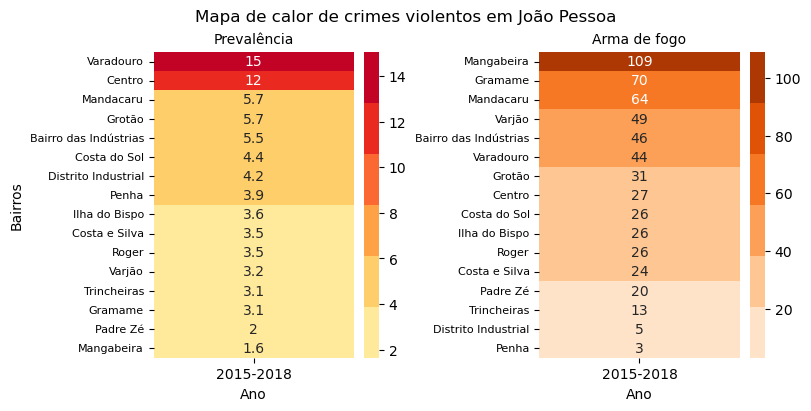

In [13]:
from pandas import pivot_table
from seaborn import heatmap,color_palette
from matplotlib.pyplot import subplots


dfp = pivot_table(dfc, index='Bairros', columns='Ano', values='Prevalência')
dfp = dfp.sort_values('2015-2018',ascending=False)

dfaf = pivot_table(dfc, index='Bairros', columns='Ano', values='Arma de fogo')
dfaf = dfaf.sort_values('2015-2018',ascending=False)

fig,ax = subplots(1,2,figsize=(8,4),constrained_layout=True)
fig.suptitle('Mapa de calor de crimes violentos em João Pessoa')


crime_p = heatmap(data=dfp,cmap=color_palette("YlOrRd"),annot=True,ax=ax[0])
crime_p.set_title('Prevalência',fontsize=10)
crime_p.set_yticklabels(crime_p.get_yticklabels(), fontsize = 8)
crime_p.set_xlim(0,1)

crime_af = heatmap(data=dfaf,cmap=color_palette("Oranges"),annot=True,fmt='d',ax=ax[1])
crime_af.set_title('Arma de fogo',fontsize=10)
crime_af.set_ylabel('')
crime_af.set_yticklabels(crime_af.get_yticklabels(), fontsize = 8);
crime_af.set_xlim(0,1);

## _Plots_ para visualizar distribuições

A estatística descritiva é limitada para resumir dados, visto que dados com características completamente distintas podem ter os mesmos valores para média, mediana e variância, por exemplo. Uma forma aprofundada de reconhecer as características dos dados é inspecionar a sua _distribuição_. No grupo das distribuições, consideraremos os seguintes _plots_:

- **histogramas**, com intervalo de classes uniforme;
- **densidades**, incluindo _densidade simples_;
- **cumulativos**, incluindo _densidade cumulativa empírica_;
- **quantis**, abrangendo o quantil-quantil (QQ-plot);

A fim de criar as primeiras representações visuais para este grupo, usaremos dados estatísticos reais concernentes a ànalise de um processo de moldagem em uma linha de produção de uma indústria química do Rio Grande do Sul. O propósito da análise era investigar inconsistências do processo. A tabela a seguir registra massas de amostras extraídas de duas matrizes (2 e 7) ao longo de três dias a cada 30 minutos no período compreendido entre 07:00h e 13:00h ({cite:p}`saldanha2013analisando`).

In [14]:
from IPython.display import display, Markdown

# leitura
df_mq = pd.read_csv('../data/matriz-quimica.csv')
df_mq
# display
#display(Markdown(df_mq.to_markdown(index=False)))

Horário  Peso (g)  Dia  Matriz
0    07:00      39.2    1       2
1    07:30      39.4    1       2
2    08:00      39.7    1       2
3    08:30      39.2    1       2
4    09:00      39.6    1       2
..     ...       ...  ...     ...
73   11:00      39.8    3       7
74   11:30      40.2    3       7
75   12:00      40.3    3       7
76   12:30      39.9    3       7
77   13:00      40.4    3       7

[78 rows x 4 columns]

### Histograma

O histograma é a representação visual mais comumemente empregada para retratar distribuições. O gráfico é composto de retângulos preenchidos cujas alturas correspondem às frequências de observação de determinados valores que compreendem um _intervalo de classe_. 

Na figura a seguir plotamos histogramas para as massas dos produtos processados em cada uma das matrizes. Por brevidade, consideramos no histograma todos os valores registrados ao longo dos 3 dias. Observamos que há _lacunas_ nos histogramas pela ausência de massas reportadas nas respectivas massas.

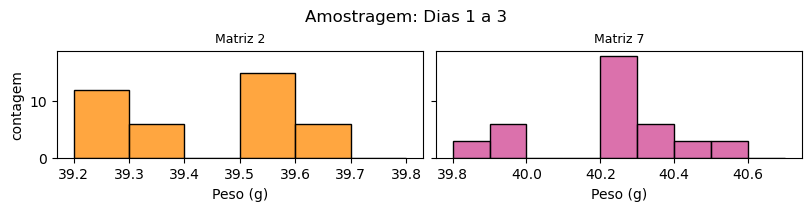

In [15]:
from seaborn import histplot
from matplotlib.pyplot import subplots

df_mq2 = df_mq[df_mq['Matriz'] == 2]
df_mq7 = df_mq[df_mq['Matriz'] == 7]

fig,ax = subplots(1,2,figsize=(8,2),constrained_layout=True,sharey=True)
fig.suptitle('Amostragem: Dias 1 a 3')
ax[0].set_ylabel('contagem')
ax[0].set_title('Matriz 2',fontsize=9)
ax[1].set_title('Matriz 7',fontsize=9)

hq_2 = histplot(data=df_mq2,x='Peso (g)',stat='count',binwidth=0.1,ax=ax[0],color='#ff8800')
hq_7 = histplot(data=df_mq7,x='Peso (g)',stat='count',binwidth=0.1,ax=ax[1])

### Densidade simples

_Plots_ de densidade simples são versões contínuas dos histogramas e vem ganhando popularidade devido à facilitação de sua construção por ferramentas computacionais modernas. Nesses gráficos, a frequência das quantidades é representada por uma curva suave que, na verdade, é uma aproximação da distribuição de probabilidade fundamental que explica o comportamento real – a qual é **desconhecida**. Tem sido frequente a estimativa da curva de densidade pela técnica dos estimadores de núcleo (_kernel density estimator_, ou simplesmente, _KDE_). 

A metodologia do KDE recompõe a curva contínua através da mistura (combinação) de várias funções conhecidas como "núcleos" (_kernels_) que são abertos em torno de cada ponto amostrado dentro de uma _largura de banda_ predefinida. Há diversos tipos de _kernel_ possíveis de se trabalhar, tais como _exponencial_, _linear_, _epanechnikov_ e o mais popular de todos, o _gaussiano_.

Abaixo, fazemos plotagens da densidade de distribuição para cada matriz da indústria. O último _plot_ contém as duas distribuições. Vê-se que a curva "imita" o comportamento já visualizado no gráfico. 

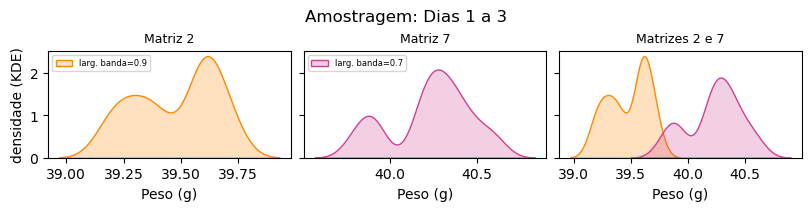

In [16]:
from seaborn import kdeplot

fig,ax = subplots(1,3,figsize=(8,2),constrained_layout=True,sharey=True)
fig.suptitle('Amostragem: Dias 1 a 3')
ax[0].set_ylabel('densidade (KDE)')
ax[0].set_title('Matriz 2',fontsize=9)
ax[1].set_title('Matriz 7',fontsize=9)
ax[2].set_title('Matrizes 2 e 7',fontsize=9)

bw=0.9
hq_2 = kdeplot(data=df_mq2,x='Peso (g)',fill=True,ax=ax[0],bw_adjust=bw,color='#ff8800',label=f'larg. banda={bw}')
hq_2.legend(fontsize=6,loc='upper left')

bw2=0.7
hq_7 = kdeplot(data=df_mq7,x='Peso (g)',fill=True,ax=ax[1],bw_adjust=bw2,label=f'larg. banda={bw2}')
hq_7.legend(fontsize=6,loc='upper left')

kdeplot(data=df_mq2,x='Peso (g)',fill=True,ax=ax[2],bw_adjust=bw,color='#ff8800',label=f'larg. banda={bw}')
kdeplot(data=df_mq7,x='Peso (g)',fill=True,ax=ax[2],bw_adjust=bw,label=f'larg. banda={bw}');

No próximo exemplo, plotamos os histogramas juntamente com a curva estimada por _KDE_.

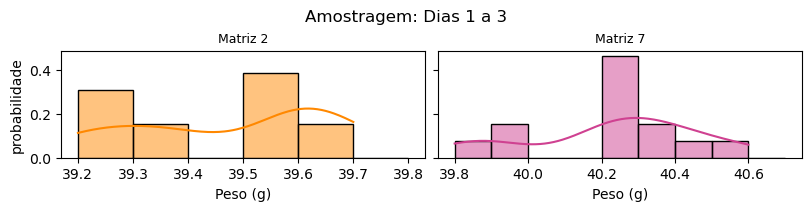

In [17]:
fig,ax = subplots(1,2,figsize=(8,2),constrained_layout=True,sharey=True)
fig.suptitle('Amostragem: Dias 1 a 3')
ax[0].set_ylabel('probabilidade')
ax[0].set_title('Matriz 2',fontsize=9)
ax[1].set_title('Matriz 7',fontsize=9)

hq_2 = histplot(data=df_mq2,x='Peso (g)',kde=True,stat='probability',binwidth=0.1,ax=ax[0],color='#ff8800')
hq_7 = histplot(data=df_mq7,x='Peso (g)',kde=True,stat='probability',binwidth=0.1,ax=ax[1])

### Densidade cumulativa

Histogramas e _plots de densidade_ possuem o revés de dependerem de parâmetros que são escolhidos pelo usuário, tais como o número de intervalos de classe (_bins_, ou _bin widths_) e a largura de banda. Pelo fato de que eles podem ser livremente alterados, esses gráficos tornam-se mais uma interpretação dos dados do que uma visualização direta deles. A desvantagem é que eles são menos intuitivos.

Opostamente, _plots_ de densidade simplesmente mostram os dados de uma só vez, sem uso de parâmetros.
Para entender minimamente o conceito de _densidade cumulativa_, ou também de _densidade cumulativa empírica_ (representada pelo acrônimo ECDF), usaremos um rol de dados que contém a nota auferida por estudantes de uma classe de Engenharia formada por 60 pessoas na primeira avaliação. A tabela pode ser encontrada a seguir.

In [18]:
df_est = pd.read_csv('../data/estudantes-notas.csv')

df_est
# display
#display(Markdown(df_est.to_markdown(index=False)))

Estudante  Nota
0           1   4.7
1           2   6.9
2           3   7.1
3           4   7.0
4           5   5.2
5           6   7.8
6           7   7.2
7           8   5.2
8           9   6.6
9          10   4.1
10         11   8.1
11         12   6.4
12         13   8.1
13         14   7.8
14         15   5.6
15         16   7.1
16         17   3.4
17         18   7.2
18         19   6.9
19         20   7.0
20         21   6.4
21         22   2.7
22         23   3.5
23         24   4.5
24         25   7.3
25         26   7.2
26         27   7.6
27         28   8.4
28         29   8.0
29         30   7.9
30         31   7.2
31         32   7.7
32         33   7.0
33         34   9.1
34         35   9.0
35         36   8.4
36         37   8.1
37         38   7.2
38         39   6.7
39         40   8.0
40         41   5.2
41         42   6.3
42         43   7.4
43         44   4.5
44         45   7.9
45         46   7.9
46         47   2.1
47         48   7.1
48         49   8.2
49         50   9.8
50         51  10.0
51         52   8.3
52         53   7.2
53         54   4.1
54         55   8.3
55         56   7.0
56         57   7.3
57         58   6.4
58         59   7.3
59         60   9.5

A distribuição cumulativa é uma representação visual que fornece dois caminhos de compreensão para os dados quantitativos em análise. 

Em primeiro lugar, sob o ponto de vista de contagem. Neste caso particular, a nota de cada estudante é disposta no eixo horizontal, enquanto que no eixo vertical consta um "ranqueamento ascendente" de estudantes. A curva cresce cumulativamente daquele(a) estudante que possui a nota mais baixa (ranqueamento 1) até o(a) estudante que possui a maior nota (ranqueamento 60).

Em segundo lugar, sob o ponto de vista de proporção. Neste caso particular, a nota de cada estudante é disposta no eixo horizontal, enquanto que no eixo vertical consta a proporção de estudantes que atingiram determinada nota. A curva é idêntica, mas podemos verificar rapidamente o ranqueamento por percentuais. Por exemplo, o gráfico mostra que em torno de 25% da turma conseguiu nota, no máximo de 6,0.

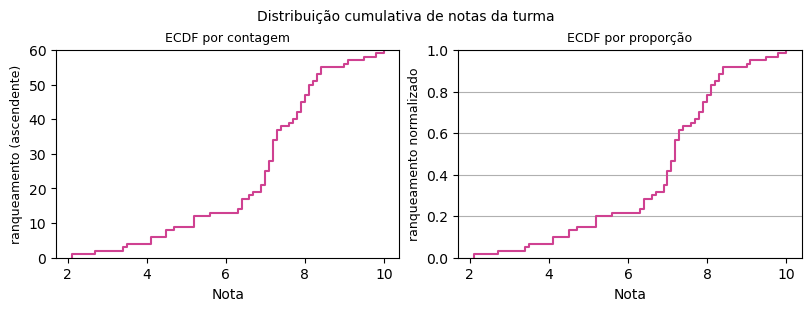

In [19]:
from seaborn import ecdfplot


fig,ax = subplots(1,2,figsize=(8,3),constrained_layout=True)
fig.suptitle('Distribuição cumulativa de notas da turma',fontsize=10)
ax[0].set_ylabel('ranqueamento (ascendente)',fontsize=9)
ax[0].set_title('ECDF por contagem',fontsize=9)

ax[1].set_ylabel('ranqueamento normalizado',fontsize=9)
ax[1].grid(axis='y')
ax[1].set_title('ECDF por proporção',fontsize=9)
fe1 = ecdfplot(data=df_est,x='Nota',stat='count',ax=ax[0])
fe2 = ecdfplot(data=df_est,x='Nota',stat='proportion',ax=ax[1])

### Quantis

Quantis são uma espécie de "ranqueamento" dos dados. Quando divididos em frações de 100, são chamados de percentis. Um jogador de futebol avaliado estatisticamete com percentil de 86%, por exemplo, indicaria que ele está entre os 14% melhores jogadores de futebol. Quantis então servem para dividir os dados ordenados em subconjuntos. 

O _plot_ chamado de quantil-quantil, ou QQ _plot_, é bastante utilizado para testar se os dados observados seguem uma determinada distribuição teórica. Quando a distribuição teórica é a _normal_, chamamos o gráfico de _plot de probabilidades normal_ (veja também similaridades com o _plot de probabilidades_, PP-_plot_).

Um QQ-_plot_ é um plot de pontos. Geralmente, coloca-se uma reta de referência. Quando os pontos desviam-se desta reta, os dados observados supostamente seguem uma distribuição que não coincide com a teórica. Em geral, é quase impossível atingir tal coincidência.                          

Para QQ-plots, deveremos instalar o módulo `seaborn-qqplot` utilizando `pip` para acessar a função `pplot`. Este módulo é uma extensão do `seaborn`.

Feitos esses passos, conseguimos gerar o seguinte gráfico de teste.

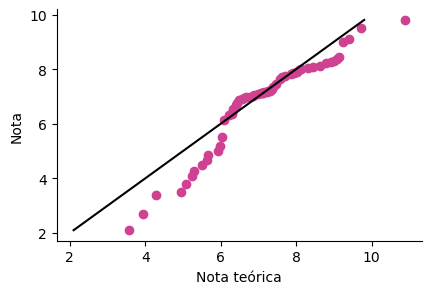

In [20]:
from seaborn_qqplot import pplot
from numpy import random

random.seed(10)
dnormal = random.normal(df_est['Nota'].mean(),df_est['Nota'].std(ddof=1),len(df_est))
df_est['Nota teórica'] = dnormal

qq = pplot(data=df_est, x='Nota teórica',y='Nota',
           kind='qq',
           height=3, 
           aspect=1.5,
           display_kws={"identity":True})

## _Plots_ para visualizar proporções

A visualização de proporções deve levar em conta projetos gráficos que sejam capazes de mostrar como algum grupo, entitade ou quantidade pode ser "quebrada" em partes menores, assim constituindo uma proporção do todo. Classicamente, o gráfico de "torta" (_pie chart_) é o mais tradicionalmente aplicado quando o interesse é visualizar proporções. Entretanto, muitos profissionais criticam seu uso exagerado. 

Torna-se complicado interpretar gráficos de torta quando ele possui "fatias" excessivas. Por outro lado, quando ele é dividido em poucas partes, seu uso é recomendado. A polêmica em torno deste gráfico não é puramente nociva. Ela apenas ressalta a inexistência de representações "ótimas" para proporções. De fato, neste grupo de plotagem, não faremos uma separação explícita sobre os estilos, mas consideraremos uma miscelânea de _plots_, tanto inspirados na estrutura de outros grupos, mas adequados para representar proporções, quanto mais genéricos, que incorporam mosaicos, árvores estruturadas (_treemap_), diagramas de Venn, _donut_, dendrogramas e raios de sol (_sunburst_).

### Barras

Podemos visualizar proporções diretamente a partir de gráficos de barras. Usaremos dados do [SIVIBE/MAPA](https://mapa-indicadores.agricultura.gov.br/publico/extensions/SIVIBE/SIVIBE.html) sobre vinhos e bebidas para exemplos. (Nota: para operacionalizar planilhas do Excel, poderá ser necessária a instalação do módulo `openpyxl`).

Abaixo fazemos 

In [21]:
from pandas import read_excel
from matplotlib.pyplot import subplots

df_parr = read_excel('../data/area-parreiral-uvas-sivibe.xlsx')
df_parr = df_parr.drop(df_parr[df_parr['Classificação'] == '-'].index).reset_index(drop=True)
df_parr

Código propriedade Classificação  Área Parreiral (calc) ha
0                 1717411      Vinífera              14644.128633
1                 1715835      Vinífera               2085.518510
2                 1712357       Híbrida                 12.548700
3                 1712357      Vinífera               1832.432534
4                 1712721     Americana                 13.185600
...                   ...           ...                       ...
41407             1731195       Híbrida                  2.240000
41408             1731050     Americana                  0.000000
41409             1730884      Vinífera                  5.792904
41410             1730188       Híbrida                  0.000000
41411             1729179       Híbrida                  4.024428

[41412 rows x 3 columns]

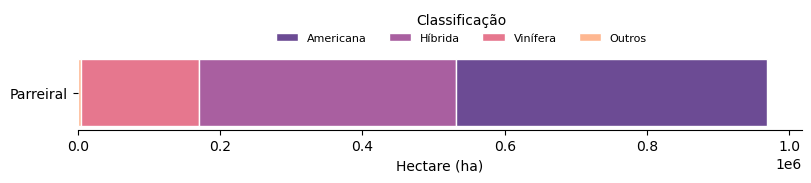

In [22]:
df_parr_grp = df_parr.groupby('Classificação').sum()
df_parr_grp['Código propriedade'] = 'Parreiral'
df_parr_grp = df_parr_grp.sort_values(by='Área Parreiral (calc) ha',ascending=False)

fig,ax = subplots(1,1,figsize=(8,1.5),constrained_layout=True)

vin = sb.histplot(df_parr_grp,
    y='Código propriedade', # use 'x' para vertical
    weights='Área Parreiral (calc) ha', # pesos
    hue='Classificação',
    multiple='stack',
    palette=color_palette('magma',4),
    edgecolor='white',
    shrink=0.9, # fator de largura
    ax = ax)

vin.set_xlabel('Hectare (ha)');
vin.set_ylabel('');

sb.move_legend(vin,"upper right",ncol=4,frameon=False,bbox_to_anchor=(.8,1.7),fontsize=8)
sb.despine(ax=ax); ax.spines['left'].set_visible(False)


### Fatias

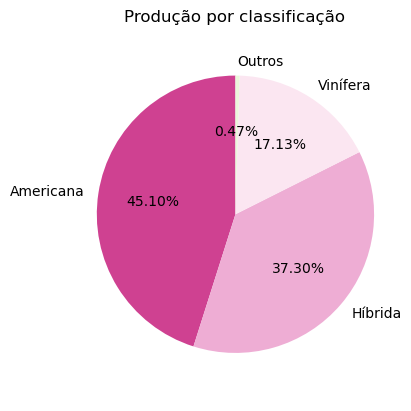

In [23]:
labels = df_parr_grp.index.to_list()
sizes = df_parr_grp['Área Parreiral (calc) ha']/df_parr_grp['Área Parreiral (calc) ha'].max()*100

fig,ax = subplots(1,1,figsize=(4,4),constrained_layout=True)
explode = (0,0,0,0)
ax.pie(sizes,explode=explode,labels=labels,autopct='%.2f%%',startangle=90)
ax.axis('equal')
ax.set_title('Produção por classificação');

### Diagrama de Venn

Vamos fazer um comparativo de um grupo de artistas que apenas cantam, apenas atuam ou cantam e atuam. A tabela está disposta a seguir:

In [24]:
from matplotlib.pyplot import subplots
from matplotlib_venn import venn2

df_arts = pd.read_csv('../data/cantores-atores.csv')
df_arts

Artista Canta Atua
0           Marisa Orth   sim  sim
1             Preta Gil   sim  sim
2        Clarice Falcão   sim  sim
3          Mariana Rios   sim  sim
4      Marjorie Estiano   sim  sim
5        Alexandre Nero   sim  sim
6            Chay Suede   sim  sim
7                  Fiuk   sim  sim
8             Fábio Jr.   sim  sim
9      Evandro Mesquita   sim  sim
10            Seu Jorge   sim  sim
11               Djavan   sim  não
12               Lenine   sim  não
13       Wesley Safadão   sim  não
14         Ana Carolina   sim  não
15         Marisa Monte   sim  não
16    Milton Nascimento   sim  não
17      Bruno Gagliasso   não  sim
18          Osmar Prado   não  sim
19        Luana Piovani   não  sim
20            Caio Blat   não  sim
21          Caio Castro   não  sim
22     Rodrigo Lombardi   não  sim
23  Fernanda Montenegro   não  sim

Para plotar diagramas de Venn, é necessário instalar o módulo `matplotlib_venn` (use `pip`). Na representação simples abaixo, temos os conjuntos variando o diâmetro em função da cardinalidade de seus elementos.

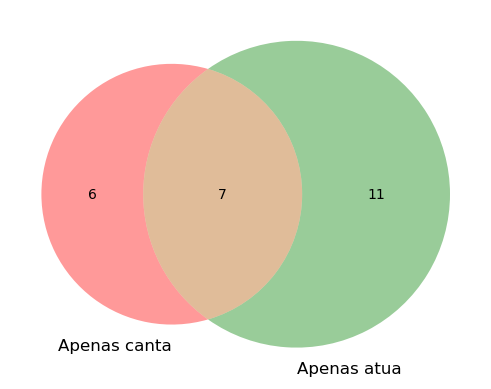

In [25]:
sn = df_arts[(df_arts['Canta'] == 'sim') & (df_arts['Atua'] == 'não')]
ss = df_arts[(df_arts['Canta'] == 'sim') & (df_arts['Atua'] == 'sim')]
ns = df_arts[(df_arts['Canta'] == 'não') & (df_arts['Atua'] == 'sim')]

venn2(subsets=(len(sn),len(ss),len(ns)),
       set_labels=('Apenas canta','Apenas atua'));

### Árvore estruturada

O diagrama de árvore estruturada (_treemap_) permite seccionar um todo em áreas representativas, como mostramos na apresentação deste curso. O _treemap_ abaixo exibe o conteúdo deste curso em termos de quadros de tamanhos que variam em função da carga horária aproximada dos módulos e avaliações. 

In [26]:
import plotly.graph_objects as go
from plotly.offline import plot
from IPython.display import display, HTML

labels = ['Visualização de Dados',
    'Módulo 1','Módulo 2','Módulo 3',
    'Conteúdo 1','Estudo de caso 1',
    'Conteúdo 2','Estudo de caso 2',
    'Conteúdo 3','Relatório Final']

parents = [''] + \
    3*['Visualização de Dados'] + \
    2*['Módulo 1'] + \
    2*['Módulo 2'] + \
    2*['Módulo 3'] 

values = [0] + \
    [.33,.33,.33] + \
    [.9,.1,.9,.1] + \
    [.7,.3]

f = go.Figure(go.Treemap(
    labels = labels,
    values = values,
    parents = parents,
    marker_colorscale = 'Greens'
))

f.update_layout(margin=dict(t=50, l=25, r=25, b=25))
plot(f, show_link=False,filename='course-treemap.html')
display(HTML('course-treemap.html'))

## _Plots_ para visualizar correlações

Correlação é qualquer associação estatística entre um par de variáveis. Quanto mais correlacionadas estão duas variáveis, mais "alinhamento" há entre elas. Isto é, uma análise de correlação fornece um número que resume o grau de relacionamento linear entre duas variáveis. Introduziremos este assunto com alguns conceitos fundamentais. 

Podemos interpretar a _correlação_ também pelo ponto de vista de "dependência linear". Duas variáveis perfeitamente correlacionadas são similares a dois vetores paralelos, ou seja, linearmente dependentes. Por outro lado, duas variáveis totalmente não correlacionadas são similares a dois vetores perpendiculares, ou seja, linearmente independentes.

Neste grupo também não apresentaremos uma divisão enfática dos tipos de representações dada a sua variedade. Estão incluídos aqui os seguintes _plots_: 

- dispersão (_scatter plot_), bolhas (_bubble chart_), inclinação (_slopegraph_), linhas;
- contornos de densidade, classes 2D (_2D bins_), classes hexagonais (_hex bins_);
- correlograma.

Para grandes dados, plots de dispersão tornam-se pouco informativos devido ao emaranhado de pontos. Em um cenário como este, são preferíveis os _plots_ de contornos e classes. Para mais do que duas quantidades, correlogramas são recomendados.

Discutiremos apenas alguns exemplos.

### Dispersão

Este exemplo investiga a dispersão existente entre dois métodos que explicam o [crescimento fetal em função da semana gestacional](https://perinatology.com/calculators/Estimation%20of%20Fetal%20Weight%20and%20Age.htm). O gráfico à esquerda mostra a curva de Hadlock e de Duryea, ambas para o percentil 10. À direita, plotamos o gráfico de dispersão entre ambas as curvas para saber como elas se correlacionam. A existência de uma "barriga" abaixo da linha pontilhada mostra que elas, de fato, são diferentes, embora possuam uma tendência equivalente. Caso todos os pontos verdes estivessem sobre a reta tracejada, diríamos que elas seriam idênticas. Ou seja, a dispersão é baixa.

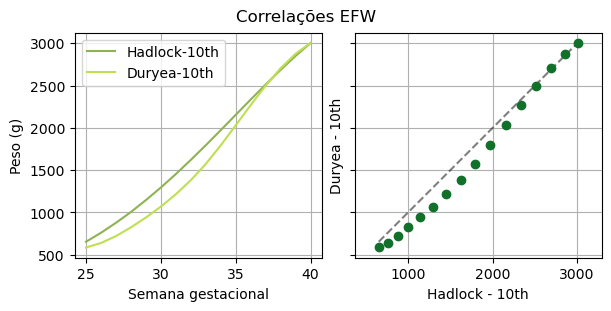

In [27]:
from matplotlib import style
from matplotlib.pyplot import plot, subplots
from pandas import read_csv

df = read_csv('../data/gestacional-peso.csv')
X = df['week']
Y1 = df['hadlock-10th']
Y2 = df['duryea-10th']

fig,ax = subplots(1,2,figsize=(6,3),sharey=True,constrained_layout=True)
fig.suptitle('Correlações EFW')

ax[0].grid()
ax[0].plot(X,Y1,'-',c='#8EB353',label='Hadlock-10th')
ax[0].plot(X,Y2,'-',c='#BFDF53',label='Duryea-10th')
ax[0].set_xlabel('Semana gestacional')
ax[0].set_ylabel('Peso (g)')
ax[0].legend()

ax[1].grid()
ax[1].plot(Y1,Y1,'--',c='k',alpha=0.5)
ax[1].plot(Y1,Y2,'o',c='#117029')
ax[1].axis('equal')
ax[1].set_xlabel('Hadlock - 10th')
ax[1].set_ylabel('Duryea - 10th');

## _Plots_ para visualizar dados geoespaciais

Dados geoespaciais são melhor dispostos através de mapas que projetam coordenadas do globo terrestre em superfícies planas. Geralmente, os mapas seguem o formato e as fronteiras de territórios. Neste grupo encontram-se:

- coropletas, ou mapas coropléticos (_choropleth_), que colorem regiões do mapa para realizar associações com quantidades ou categorias.
- cartogramas, que se constituem em representações distorcidas ou simplificadas das regiões. Por exemplo, associar estados da federação a formas retangulares menores arranjadas sobre uma forma poligonal maior próxima ao formato do Brasil.

O exemplo a seguir é uma coropleta para a população brasileira segundo dados do IBGE para o Censo 2022. Os valores são exibidos na tabela.

/Users/gustavo/opt/anaconda3/envs/dataviz/lib/python3.9/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


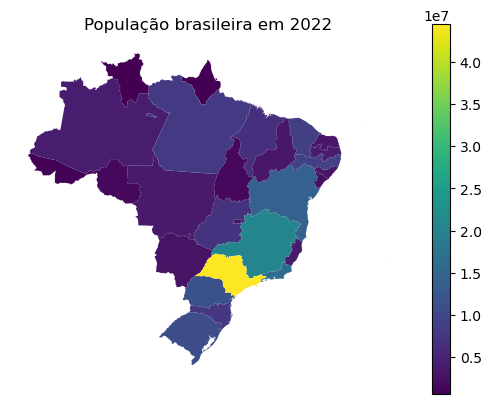

In [1]:
import json, geopandas as geo, pandas as pd, matplotlib.pyplot as plt
from urllib.request import urlopen

# A URL para raspar a população brasileira em 2020 
# pode ser construída pelo Query Builder da API do IBGE.
# Ver: https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq

# carrega o JSON, reconstroi daframe e limpa
data = json.loads(urlopen('https://servicodados.ibge.gov.br/api/v3/agregados/4709/periodos/2022/variaveis/93?localidades=N3[all]').read())
pop = pd.json_normalize(data[0]['resultados'][0]['series'])
pop = pop.rename(columns={'localidade.nome':'UF','serie.2022':'Pop 2022'})
pop = pop[['UF','Pop 2022']].sort_values(by='UF').reset_index(drop=True)
pop['Pop 2022'] = pop['Pop 2022'].astype(float)

# malha nacional
geobr = geo.read_file('../data/gadm36_BRA_shp/gadm36_BRA_1.shp')


# recupera polígonos de estados, visto que ordenação difere em ambos os dataframes
geom = []
for uf in pop.UF:
    geom.append(geobr[geobr.NAME_1 == uf]['geometry'].values[0])
pop['geometry'] = geom

# cria objeto GeoDF
pop = geo.GeoDataFrame(pop)

# plota coropleta para população em 2022
f,a = plt.subplots()
pop.plot(ax=a,column='Pop 2022',
         cmap="viridis", # Color palette
         legend=True) # Add legend

a.axis('off')
a.set_title('População brasileira em 2022');

In [4]:
pop

UF    Pop 2022  \
0                  Acre    830018.0   
1               Alagoas   3127683.0   
2                 Amapá    733759.0   
3              Amazonas   3941613.0   
4                 Bahia  14141626.0   
5                 Ceará   8794957.0   
6      Distrito Federal   2817381.0   
7        Espírito Santo   3833712.0   
8                 Goiás   7056495.0   
9              Maranhão   6776699.0   
10          Mato Grosso   3658649.0   
11   Mato Grosso do Sul   2757013.0   
12         Minas Gerais  20539989.0   
13               Paraná  11444380.0   
14              Paraíba   3974687.0   
15                 Pará   8120131.0   
16           Pernambuco   9058931.0   
17                Piauí   3271199.0   
18  Rio Grande do Norte   3302729.0   
19    Rio Grande do Sul  10882965.0   
20       Rio de Janeiro  16055174.0   
21             Rondônia   1581196.0   
22              Roraima    636707.0   
23       Santa Catarina   7610361.0   
24              Sergipe   2210004.0   
25            São Paulo  44411238.0   
26            Tocantins   1511460.0   

                                             geometry  
0   POLYGON ((-68.10553 -10.72192, -68.10547 -10.7...  
1   MULTIPOLYGON (((-35.88986 -9.84431, -35.88986 ...  
2   MULTIPOLYGON (((-50.82570 2.52208, -50.82570 2...  
3   POLYGON ((-58.13699 -7.35614, -58.13682 -7.356...  
4   MULTIPOLYGON (((-38.69208 -17.95958, -38.69208...  
5   MULTIPOLYGON (((-40.83181 -2.88125, -40.83181 ...  
6   POLYGON ((-47.93915 -16.05135, -48.02110 -16.0...  
7   MULTIPOLYGON (((-40.88403 -21.16125, -40.88403...  
8   POLYGON ((-49.00480 -18.53718, -49.01248 -18.5...  
9   MULTIPOLYGON (((-44.54986 -1.88458, -44.54986 ...  
10  POLYGON ((-52.47143 -16.12672, -52.48842 -16.1...  
11  POLYGON ((-54.16836 -23.99920, -54.17063 -24.0...  
12  POLYGON ((-50.84402 -19.96758, -50.85332 -19.9...  
13  MULTIPOLYGON (((-48.36514 -25.73403, -48.36514...  
14  MULTIPOLYGON (((-43.01208 -9.40801, -43.01453 ...  
15  MULTIPOLYGON (((-47.29792 -0.63375, -47.29792 ...  
16  MULTIPOLYGON (((-35.13597 -8.83792, -35.13597 ...  
17  POLYGON ((-42.69078 -9.54547, -42.69122 -9.545...  
18  MULTIPOLYGON (((-35.10958 -6.19375, -35.10958 ...  
19  MULTIPOLYGON (((-52.07069 -32.02847, -52.07069...  
20  MULTIPOLYGON (((-44.67125 -23.35458, -44.67125...  
21  POLYGON ((-62.89219 -12.86014, -62.89212 -12.8...  
22  POLYGON ((-60.03790 0.26349, -60.04676 0.23211...  
23  MULTIPOLYGON (((-48.54236 -27.93180, -48.54236...  
24  MULTIPOLYGON (((-37.38458 -11.45986, -37.38458...  
25  MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...  
26  POLYGON ((-49.23736 -12.88397, -49.23532 -12.8...

## _Plots_ para visualizar incertezas

Incertezas são inerentes a medições experimentais e laboratoriais, bem como a cálculos que envolvem estimativas e previsões sobre ocorrências futuras. Geralmente, incertezas são representadas por barras ou áreas que se estendem em torno de um ponto ou linha de referência. Neste grupo, incluem-se os plots acompanhados de barras de erro de intervalos de confiança.

## Referências

```{bibliography}
:filter: docname in docnames
```